# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [147]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

# File to Load (Remember to change these)
city_data_to_load = os.path.join("Resources", "city_data.csv")
ride_data_to_load = os.path.join("Resources", "ride_data.csv")

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

### Merge the DataFrames

In [148]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


## Deliverable 1: Get a Summary DataFrame 

In [149]:
#  1. Get the total rides for each city type
sum_rides_by_type= pyber_data_df.groupby(["type"]).count()["ride_id"]
sum_rides_by_type

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [150]:
# 2. Get the total drivers for each city type
sum_drivers_by_type= city_data_df.groupby(["type"]).sum()["driver_count"]
sum_drivers_by_type

type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64

In [151]:
#  3. Get the total amount of fares for each city type
sum_fares_by_type = pyber_data_df.groupby(["type"]).sum()["fare"]
sum_fares_by_type

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [152]:
#  4. Get the average fare per ride for each city type. 
avg_fare_by_type=sum_fares_by_type / sum_rides_by_type
avg_fare_by_type

type
Rural       34.623440
Suburban    30.970128
Urban       24.525772
dtype: float64

In [153]:
# 5. Get the average fare per driver for each city type. 
avg_fare_per_driver= sum_fares_by_type / sum_drivers_by_type
avg_fare_per_driver

type
Rural       55.486282
Suburban    39.502714
Urban       16.571468
dtype: float64

In [181]:
#  6. Create a PyBer summary DataFrame. 
summary_df=pd.DataFrame()
summary_df["Total Rides"]= sum_rides_by_type
summary_df["Total Drivers"]= sum_drivers_by_type
summary_df["Total Fares"]= sum_fares_by_type
summary_df["Average Fare per Ride"]= avg_fare_by_type
summary_df["Average Fare per Driver"]= avg_fare_per_driver

summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
type,,,,,
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [182]:
#  7. Cleaning up the DataFrame. Delete the index name
summary_df.index.name = None

In [183]:
#  8. Format the columns.
summary_df["Total Rides"] = summary_df["Total Rides"].map("{:,}".format)
summary_df["Total Drivers"] = summary_df["Total Drivers"].map("{:,}".format)
summary_df["Total Fares"] = summary_df["Total Fares"].map("${:,.2f}".format)
summary_df["Average Fare per Ride"] = summary_df["Average Fare per Ride"].map("${:,.2f}".format)
summary_df["Average Fare per Driver"] = summary_df["Average Fare per Driver"].map("${:,.2f}".format)

summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,"$4,327.93",$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$39.50
Urban,"1,625","2,405","$39,854.38",$24.53,$16.57


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [57]:
# 1. Read the merged DataFrame
pyber_data_df

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban
...,...,...,...,...,...,...
2370,Michaelberg,2019-04-29 17:04:39,13.38,8550365057598,6,Rural
2371,Lake Latoyabury,2019-01-30 00:05:47,20.76,9018727594352,2,Rural
2372,North Jaime,2019-02-10 21:03:50,11.11,2781339863778,1,Rural
2373,West Heather,2019-05-07 19:22:15,44.94,4256853490277,4,Rural


In [59]:
# 2. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.
fare_by_date_df= pyber_data_df.groupby(["type", "date"]).sum()[["fare"]]
fare_by_date_df.tail(10)

fare
type  date                      
Urban 2019-05-07 17:27:48   6.39
      2019-05-07 20:05:15  24.20
      2019-05-07 20:22:19  18.74
      2019-05-08 01:54:18  32.69
      2019-05-08 02:31:25  41.33
      2019-05-08 04:20:00  21.99
      2019-05-08 04:39:49  18.45
      2019-05-08 07:29:01  18.55
      2019-05-08 11:38:35  19.77
      2019-05-08 13:10:18  18.04

In [62]:
# 3. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
fare_by_date_df = fare_by_date_df.reset_index()
fare_by_date_df.tail(10)

,type,date,fare
2365,Urban,2019-05-07 17:27:48,6.39
2366,Urban,2019-05-07 20:05:15,24.20
2367,Urban,2019-05-07 20:22:19,18.74
2368,Urban,2019-05-08 01:54:18,32.69
2369,Urban,2019-05-08 02:31:25,41.33
2370,Urban,2019-05-08 04:20:00,21.99
2371,Urban,2019-05-08 04:39:49,18.45
2372,Urban,2019-05-08 07:29:01,18.55
2373,Urban,2019-05-08 11:38:35,19.77
2374,Urban,2019-05-08 13:10:18,18.04


In [63]:
# 4. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 
fare_by_date_df_pivot=fare_by_date_df.pivot(index="date", columns="type", values="fare")
fare_by_date_df_pivot.tail(10)

type,Rural,Suburban,Urban
date,,,
2019-05-07 20:05:15,NaN,NaN,24.20
2019-05-07 20:22:19,NaN,NaN,18.74
2019-05-07 20:40:29,NaN,24.89,NaN
2019-05-08 01:54:18,NaN,NaN,32.69
2019-05-08 02:31:25,NaN,NaN,41.33
2019-05-08 04:20:00,NaN,NaN,21.99
2019-05-08 04:39:49,NaN,NaN,18.45
2019-05-08 07:29:01,NaN,NaN,18.55
2019-05-08 11:38:35,NaN,NaN,19.77


In [72]:
# 5. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.

PyBer_pivot_df=fare_by_date_df_pivot.loc['2019-01-01':'2019-04-29']
PyBer_pivot_df

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
...,...,...,...
2019-04-28 14:28:36,NaN,NaN,11.46
2019-04-28 16:29:16,NaN,NaN,36.42
2019-04-28 17:26:52,NaN,NaN,31.43


In [73]:
# 6. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
PyBer_pivot_df.index = pd.to_datetime(PyBer_pivot_df.index)
PyBer_pivot_df.index

DatetimeIndex(['2019-01-01 00:08:16', '2019-01-01 00:46:46',
               '2019-01-01 02:07:24', '2019-01-01 03:46:50',
               '2019-01-01 05:23:21', '2019-01-01 09:45:36',
               '2019-01-01 12:32:48', '2019-01-01 14:40:14',
               '2019-01-01 14:42:25', '2019-01-01 14:52:06',
               ...
               '2019-04-28 09:25:03', '2019-04-28 10:54:14',
               '2019-04-28 11:40:49', '2019-04-28 11:49:26',
               '2019-04-28 12:48:34', '2019-04-28 14:28:36',
               '2019-04-28 16:29:16', '2019-04-28 17:26:52',
               '2019-04-28 17:38:09', '2019-04-28 19:35:03'],
              dtype='datetime64[ns]', name='date', length=2196, freq=None)

In [74]:
# 7. Check that the datatype for the index is datetime using df.info()
PyBer_pivot_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2196 entries, 2019-01-01 00:08:16 to 2019-04-28 19:35:03
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     114 non-null    float64
 1   Suburban  573 non-null    float64
 2   Urban     1509 non-null   float64
dtypes: float64(3)
memory usage: 68.6 KB


In [112]:
# 8. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.
Weekly_fares_df=PyBer_pivot_df.resample("W").sum()
Weekly_fares_df

type,Rural,Suburban,Urban
date,,,
2019-01-06,187.92,721.60,1661.68
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94
2019-02-10,115.80,974.34,2162.64
2019-02-17,95.82,1045.50,2235.07
2019-02-24,419.06,1412.74,2466.29
2019-03-03,175.14,858.46,2218.20


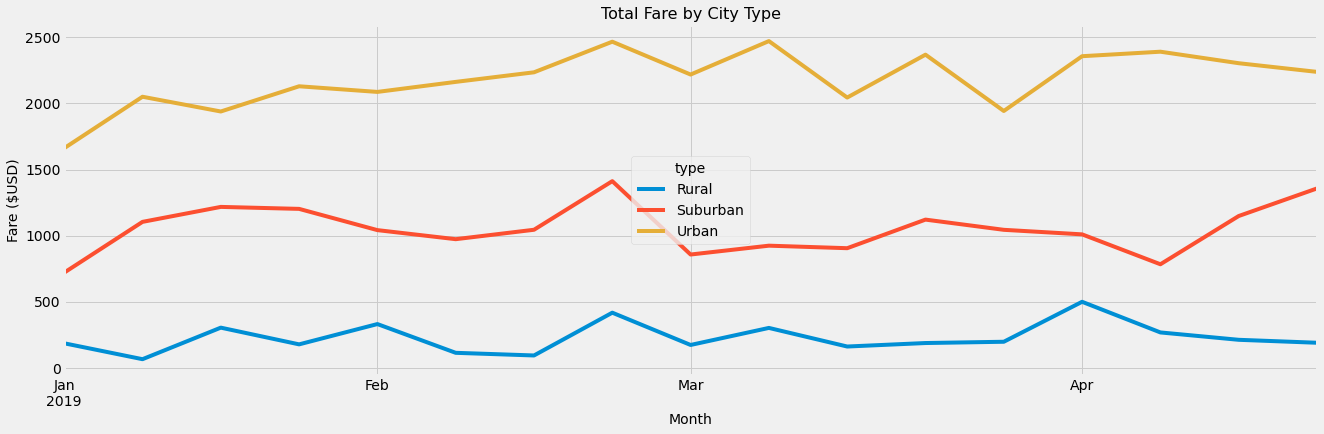

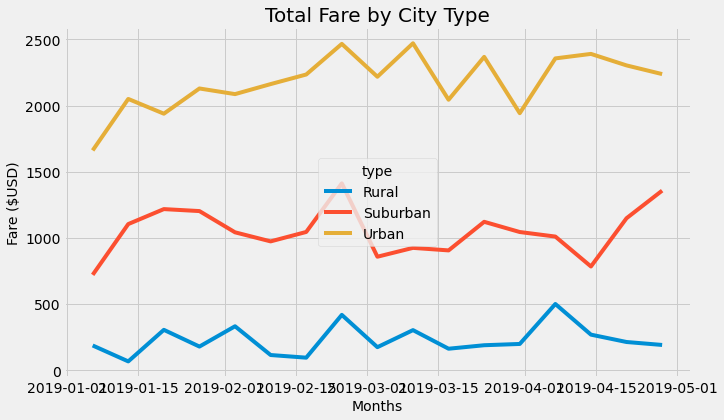

In [180]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 
%matplotlib inline
# Import the style from Matplotlib.
from matplotlib import style
# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')
Weekly_fares_df.plot(figsize=(20,6))
lgnd = plt.legend(fontsize="14", loc="center", title="type")
lgnd.get_title().set_fontsize(14)
plt.title("Total Fare by City Type", fontsize=16)
plt.ylabel("Fare ($USD)", fontsize=14)
plt.xlabel("Month", fontsize=14)

# Save figure
plt.savefig("analysis/Fig8.png")

plt.show()


# Create the plot with ax.plt()
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(Weekly_fares_df)
ax.set_title('Total Fare by City Type',fontsize=20)
ax.set_ylabel('Fare ($USD)',fontsize=14)
ax.set_xlabel('Months',fontsize=14)

ax.legend(['Rural','Suburban','Urban'], loc='best', title='type', fontsize=14)

